In [2]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [3]:


# Use relative path in WSL issues
main_outdir = "../imgs"

# READ PATHS (Dumps)
parent_outputdir = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/final01_01_finetuning_sgd/logs/GRID_SOLVER-BASE_LR=0-01_SOLVER-MOMENTUM=0-0_SOLVER-NESTEROV=True/2022-09-13_10-53-52_UID958392f7-c477-4a09-a7ac-c72cc81251c2/transfer_eval/postprocess_results"
dump_filename_fmt = "{}_instance_count.csv"
# action_instance_count.csv  noun_instance_count.csv  verb_instance_count.csv

# Plot configs
plot_config = {
    "color": 'royalblue',
    "dpi": 600,
    "figsize": (6,6),
    "xlabel": "re-exposure iterations",
    "ylabel": "",
    "title": None
}


[None, None]

[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(0.7708971331539497, 236.08856768657134)

(0.7891412718263224, 144.46082605230876)

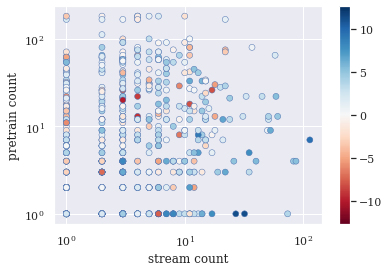

[None, None]

[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(0.6709096389377845, 4365.7145910697145)

(0.7486392837909545, 436.7924674539382)

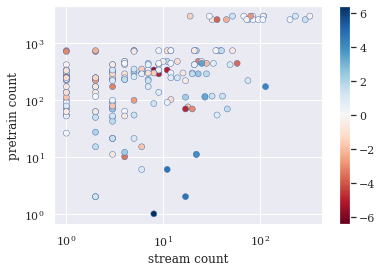

[None, None]

[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(0.7222644841586796, 927.638025536367)

(0.7499212254665676, 421.37759176425345)

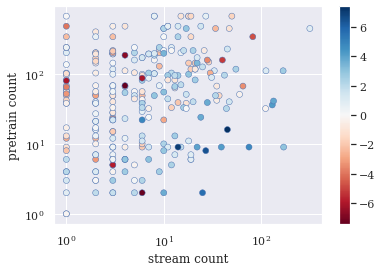

In [3]:
# For colorbar next to scatter, SEE: https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot
import datetime

# Apply the default theme
# sns.set(font_scale=1.1)
sns.set_context("paper")
sns.set_theme(rc={
    'font.family':'DeJavu Serif',
    'font.serif': 'Times New Roman',
    'font.size':30,
})



title = "INSTANCE_COUNT"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)


# Read csv
metric_to_plot = "avg_stream_HAG"
cmap = 'RdBu' #'coolwarm'#'Spectral' # 'RdBu'#"viridis"
action_modes = ['action','verb','noun']
for action_mode in action_modes:
    csv_path =os.path.join(parent_outputdir, dump_filename_fmt.format(action_mode))
    df = pd.read_csv(csv_path)

    # PLOTS
    ax = sns.scatterplot(
        data=df,
        x="stream_count", y="pretrain_count",  hue=metric_to_plot, #col="user",
        palette=sns.color_palette(cmap, as_cmap=True),
        edgecolor="b", 
#         linewidth=0.2
    )
#     ax = sns.jointplot(data=df, x="stream_count", y="pretrain_count",)
    ax.set(xscale="log", yscale="log")

    # Make colorbar for on side
#     norm = plt.Normalize(df[metric_to_plot].min(), df[metric_to_plot].max()) # Standard normalize
    max_abs = max(abs(df[metric_to_plot].min()),abs(df[metric_to_plot].max()))
    norm = plt.Normalize(-max_abs, max_abs) # Put 0 in the middle
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    
    ax.set(xlabel='stream count', ylabel=f"pretrain count")
    plt.ylim(None, None)
    plt.xlim(None, None)
    
    
    filename = f'{action_mode}_{title}.pdf'
    filepath = os.path.join(parent_dirpath,filename)
    os.makedirs(parent_dirpath, exist_ok=True)
    ax.get_figure().savefig(filepath)
    
    plt.show()
    plt.close('all')


' USE KDE for pos and negs separately '

(0.1, 10000)

(0.1, 1000)

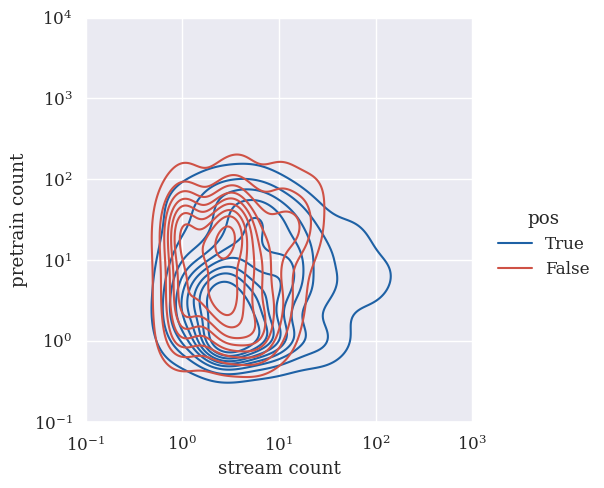

(0.1, 10000)

(0.1, 1000)

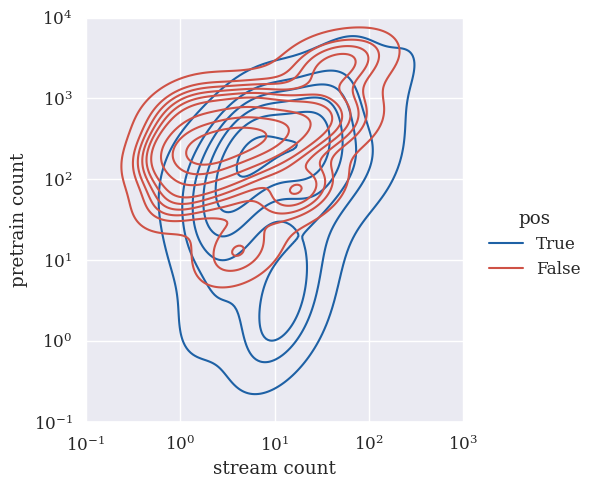

(0.1, 10000)

(0.1, 1000)

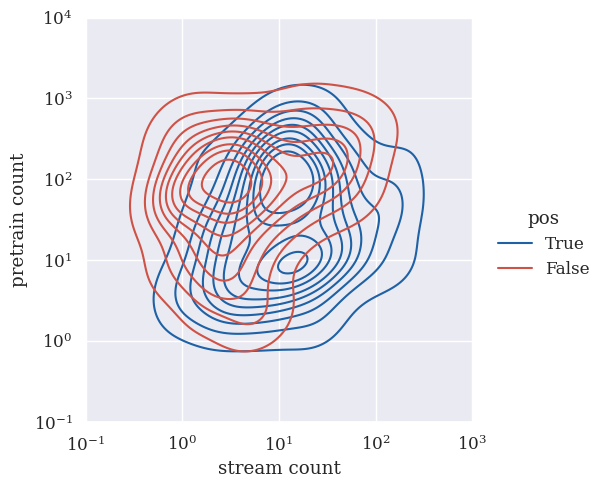

[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

In [5]:
""" USE KDE for pos and negs separately """

import datetime
plt.rcParams["font.family"] = "Times New Roman"

# Apply the default theme
# sns.set(font_scale=1.1)
sns.set_context("paper")
# sns.set_theme(rc={
#     'font.family':'DeJavu Serif',
#     'font.serif': 'Times New Roman',
#     'font.size':30,
# })
sns.set(rc={
    'figure.figsize':(6,5),
})

sns.set(font_scale=1.1)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


title = "INSTANCE_COUNT"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)

log_scale = True

# Read csv
metric_to_plot = "avg_stream_HAG"
cmap = 'RdBu' #'coolwarm'#'Spectral' # 'RdBu'#"viridis"
cmap = "coolwarm"



action_modes = ['action','verb','noun']
for action_mode in action_modes:
    csv_path =os.path.join(parent_outputdir, dump_filename_fmt.format(action_mode))
    df = pd.read_csv(csv_path)
    
    # PLOTS
#     ax = sns.scatterplot(
#         data=df,
#         x="stream_count", y="pretrain_count",  hue=metric_to_plot, #col="user",
#         palette=sns.color_palette(cmap, as_cmap=True),
#         edgecolor="b", 
# #         linewidth=0.2
#     )
#     ax.set(xscale="log", yscale="log")
    
    
    # To log-scale
#     if log_scale:
#         df.stream_count = np.log10(df.stream_count)
#         df.pretrain_count = np.log10(df.pretrain_count)


    
    df['pos'] = df[metric_to_plot] >=0
    df[metric_to_plot] = df[metric_to_plot].abs()
    
    ax = sns.displot(data=df, x="stream_count", y="pretrain_count",weights=metric_to_plot,kind="kde",hue='pos',
                     log_scale=10,
#                     fill=False, levels=10, 
                     palette=[sns.color_palette("RdBu", 10)[9],sns.color_palette("RdBu", 10)[1]],
                     hue_order=[True,False]
                    )

#     if log_scale:
#         locs, labels = plt.xticks()
#         ax.set(xticklabels=["$10^{" + i.get_text() + "}$" for i in labels])
        
#         locs, labels = plt.yticks()
#         ax.set(yticklabels=["$10^{" + i.get_text() + "}$" for i in labels])

    ax.set(xlabel='stream count', ylabel=f"pretrain count")
    plt.ylim(10**(-1), 10**4)
    plt.xlim(10**(-1), 10**3)
    
    
    filename = f'{action_mode}_{title}.pdf'
    filepath = os.path.join(parent_dirpath,filename)
    os.makedirs(parent_dirpath, exist_ok=True)
    ax.savefig(filepath)
    
    plt.show()
    plt.close('all')

sns.color_palette("RdBu", 10)

In [5]:
"""Advance version with binning."""
# For colorbar next to scatter, SEE: https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot
import datetime

# Apply the default theme
# sns.set(font_scale=1.1)
sns.set_context("paper")
sns.set_theme(rc={
    'font.family':'DeJavu Serif',
    'font.serif': 'Times New Roman',
    'font.size':30,
})



title = "INSTANCE_COUNT"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)


# Read csv
metric_to_plot = "avg_stream_HAG"
cmap = 'RdBu' #'coolwarm'#'Spectral' # 'RdBu'#"viridis"
action_modes = ['action','verb','noun']
for action_mode in action_modes:
    csv_path =os.path.join(parent_outputdir, dump_filename_fmt.format(action_mode))
    df = pd.read_csv(csv_path)
#     df

    # Get CORRELATIOn
#     corr = scipy.stats.pearsonr(df.iter_delta, df.forg,)
#     print(fr"$\rho = {round(corr[0],2)}$")
#     print(fr"$\text{{avg. RF}} = {round(df.forg.mean(),2)} \pm {round(df.forg.sem(),2)}$")
    
    # Log x-axis for binning
    df = np.log10()
    
    # PLOTS
    nb_bins = 10
    bin_means = scipy.stats.binned_statistic(df.stream_count, df.pretrain_count, statistic='mean', bins=nb_bins, range=None)
    bin_sems = scipy.stats.binned_statistic(df.stream_count, df.pretrain_count, statistic=scipy.stats.sem, bins=nb_bins, range=None)

    print(f"bin_means={bin_means}")
    print(f"bin_sems={bin_sems}")
    continue
#     ax = sns.scatterplot(
#         data=df,
#         x="stream_count", y="pretrain_count",  hue=metric_to_plot, #col="user",
#         palette=sns.color_palette(cmap, as_cmap=True),
#         edgecolor="b", 
#     )
    
    ax = sns.barplot(x='Param', y='Value', data=df, hue='Name', palette='CMRmap_r')
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df["error"], fmt="none", c="k")
    plt.show()
    
    ax.set(xlabel='stream count', ylabel=f"pretrain count")
    plt.ylim(None, None)
    plt.xlim(None, None)
    
    
#     filename = f'{action_mode}_{title}.pdf'
#     filepath = os.path.join(parent_dirpath,filename)
#     os.makedirs(parent_dirpath, exist_ok=True)
#     ax.get_figure().savefig(filepath)
    
    plt.show()
    plt.close('all')


'Advance version with binning.'

TypeError: log10() takes from 1 to 2 positional arguments but 0 were given